Dependencies will be tested between existing features and constructed features with the fraud tags

- constructed numerical feature: fraud proportion of the same card/ip address/email in the past
- constructed categorical boolean feature: anonymous (ip address, email address)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import sklearn as sci
%matplotlib inline
%load_ext autoreload
%autoreload

df = pd.read_csv('adyen-dataset.csv')

In [2]:
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,GR,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,BR,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,NL,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,NL,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,BR,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False


In [14]:
import datetime
def to_date(year, days_of_year, hour, minute):
    date = datetime.datetime(year, 1, 1) + datetime.timedelta(days_of_year - 1)
    return datetime.datetime(year=date.year, month=date.month, day=date.day, hour=hour, minute=minute)
df['datetime'] = df.apply(lambda row: to_date(row['year'], row['day_of_year'], row['hour_of_day'], row['minute_of_hour']), axis=1)

In [15]:
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,datetime
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,...,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False,2021-07-25 13:51:00
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,...,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False,2021-12-11 15:20:00
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,...,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False,2021-10-20 01:56:00
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,...,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True,2021-08-30 12:50:00
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,...,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False,2021-11-14 19:26:00


In [32]:
df = df.sort_values(by="datetime")
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,datetime
47095,74588836273,Merchant B,MasterCard,2021,0,17,1,True,61.84,GR,...,iOS,NaN,-O3ZNM2PhNWiMwxhfnn3Ew,qO276RrcCHXnFdJYhsrKog,Ecommerce,DFFF,4526,True,False,2021-01-01 00:17:00
109111,84312413437,Merchant B,Other,2021,0,19,1,False,20.80,ZW,...,iOS,NaN,NaN,GReZubXFTrofD4bIfDwOEA,Ecommerce,DB,4526,False,False,2021-01-01 00:19:00
82841,15700686694,Merchant D,Other,2021,0,31,1,False,95.55,BR,...,Windows,f3ocVUgTPGxVrlhpOLYGaQ,w-YhoWIptK37VLEmfjXkUg,qarDDPsTDtdnKDFIX0lJ5A,POS,AAD,4891,False,False,2021-01-01 00:31:00
114570,76831611562,Merchant B,Visa,2021,0,42,1,True,17.83,NL,...,iOS,pCkS1NlcwmwqcTg06EU6Xg,K5-QrrBlpajXvDsYlMwiLw,W146roVdfL8V_d0W9J7jjA,Ecommerce,3941,4556,False,False,2021-01-01 00:42:00
131610,78860525616,Merchant D,Other,2021,0,42,1,True,16.38,NL,...,MacOS,NaN,j_Bl945hKPB8YvX0hbCQRA,_4qQSOFLt55qtiLpZnNbBA,Ecommerce,1104,4556,False,False,2021-01-01 00:42:00


In [42]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
df_card = df[df['card_number'] == "gLZvKVK0zdRzRlhufrrZjQ"]


,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,datetime
56299,12038500249,Merchant A,Other,2021,20,55,209,False,123.90,GR,...,MacOS,nzKBxRDpQNoWtCGpb6KDBQ,n9iW182FS26i7RZ1ZQQsiA,gLZvKVK0zdRzRlhufrrZjQ,POS,FGDD,4916,False,False,2021-07-28 20:55:00
119163,68606498505,Merchant A,Visa,2021,17,39,212,True,10.73,NL,...,Other,nzKBxRDpQNoWtCGpb6KDBQ,n9iW182FS26i7RZ1ZQQsiA,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,1104,4622,False,True,2021-07-31 17:39:00
116819,63542890857,Merchant D,Visa,2021,9,19,214,True,318.65,NL,...,Linux,NaN,n9iW182FS26i7RZ1ZQQsiA,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,1104,4891,False,False,2021-08-02 09:19:00
95609,23198707439,Merchant A,MasterCard,2021,17,41,215,False,148.25,ZW,...,Linux,nzKBxRDpQNoWtCGpb6KDBQ,n9iW182FS26i7RZ1ZQQsiA,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,EB,4236,False,False,2021-08-03 17:41:00
11962,62246489135,Merchant A,MasterCard,2021,15,53,216,True,39.91,NL,...,MacOS,nzKBxRDpQNoWtCGpb6KDBQ,n9iW182FS26i7RZ1ZQQsiA,gLZvKVK0zdRzRlhufrrZjQ,POS,2039,4645,False,False,2021-08-04 15:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20822,78504480876,Merchant B,Amex,2021,6,32,358,True,12.61,GR,...,Linux,nzKBxRDpQNoWtCGpb6KDBQ,n9iW182FS26i7RZ1ZQQsiA,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,XDED,4916,True,False,2021-12-24 06:32:00
89471,57126406675,Merchant D,Visa,2021,18,45,360,True,141.41,BR,...,Other,nzKBxRDpQNoWtCGpb6KDBQ,n9iW182FS26i7RZ1ZQQsiA,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,AAD,4622,True,False,2021-12-26 18:45:00
3000,65357559682,Merchant D,Amex,2021,21,20,360,True,66.83,ZW,...,Android,nzKBxRDpQNoWtCGpb6KDBQ,NaN,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,BB,4916,True,False,2021-12-26 21:20:00
112789,44502494972,Merchant B,Visa,2021,22,43,363,True,49.20,BR,...,Other,nzKBxRDpQNoWtCGpb6KDBQ,n9iW182FS26i7RZ1ZQQsiA,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,XOL,4526,True,False,2021-12-29 22:43:00


<AxesSubplot:xlabel='datetime', ylabel='eur_amount'>

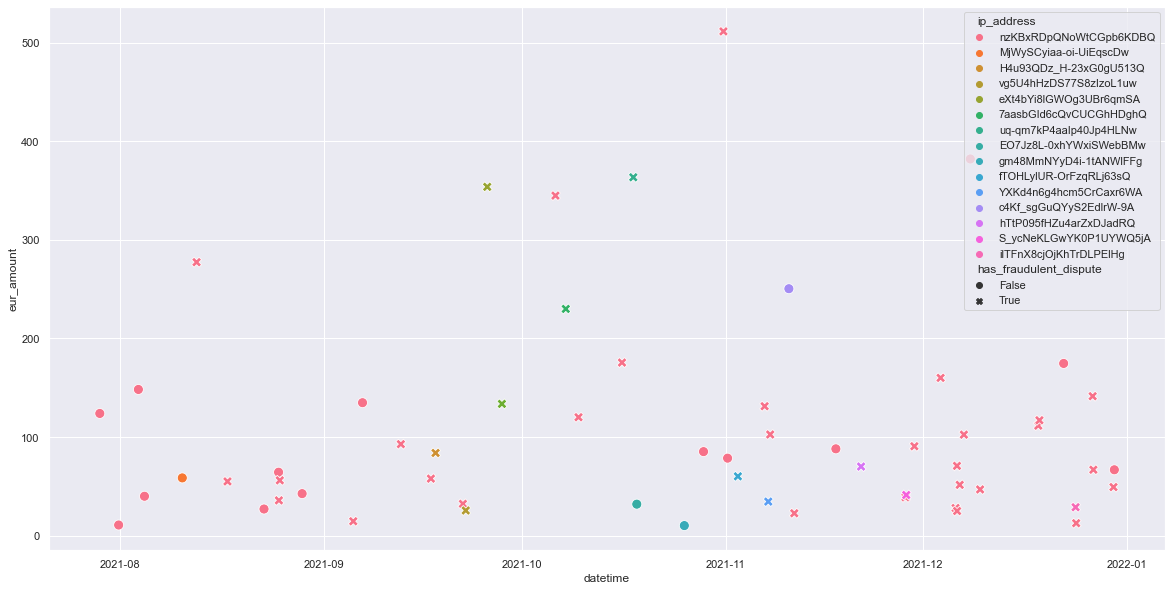

In [51]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="datetime", y="eur_amount",hue="ip_address",style="has_fraudulent_dispute",s=100,data=df_card)

IP Address ->